In [36]:
## load initial packages
import pandas as pd
import numpy as np
import striprtf
import re
import os
import geopandas as gpd
import matplotlib.pyplot as plt

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
## load datasets
alabama_hl = pd.read_excel("./al_hl_scores.xlsx")
alabama_hl

,Census block group ID,Health literacy estimate
0,10010201001,248.91
1,10010201002,248.66
2,10010202001,233.55
3,10010202002,238.55
4,10010203001,247.96
...,...,...
3430,11339658004,238.57
3431,11339658005,240.85
3432,11339659001,234.09
3433,11339659002,242.73


In [70]:
from striprtf.striprtf import rtf_to_text

def extract_addresses_from_rtfs(folder_path):
    addresses = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".rtf"):
            rtf_path = os.path.join(folder_path, filename)
            with open(rtf_path) as infile:
                content = infile.read()
                text = rtf_to_text(content)
                pattern = r"(?<=\|)\s*([^|]+)\s*\|"
                addresses_dirty = re.findall(pattern, text)
                pattern1 = r".*?\d{5}-\d{4}"
                addresses_clean = [re.findall(pattern1, address) for address in addresses_dirty]
                addresses.append(addresses_clean)
    return addresses

addresses = extract_addresses_from_rtfs("./AL_CHC")
a1 = [x for x in addresses[0] if x]
a2 = [x for x in addresses[1] if x]
a3 = [x for x in addresses[2] if x]
a4 = [x for x in addresses[3] if x]

addresses_al = a1 + a2 + a3 + a4

addresses_al
    
len(addresses_al) # it's close... allegedly there are 187 CHCs...


[['102 Physicians Dr STE B Muscle Shoals, AL 35661-2149'],
 ['216 Marengo St STE A Florence, AL 35630-6034'],
 ['318 Coffee Ave NE Russellville, AL 35653-2331'],
 ['1841 Al Highway 20 Town Creek, AL 35672-2500'],
 ['3840 Gault Ave N Fort Payne, AL 35967-5211'],
 ['34617 Al Highway 75 Fyffe, AL 35971-3488'],
 ['502 N 27th St Gadsden, AL 35904-1580'],
 ['2016 Main Ave SW Cullman, AL 35055-5239'],
 ['12062 Al Highway 227 Geraldine, AL 35974-3562'],
 ['8225 AL Highway 75 Horton, AL 35980-8473'],
 ['1216 Wilbanks Ave Gadsden, AL 35903-2024'],
 ['1409 Springfield Ave Gadsden, AL 35903-2819'],
 ['420 N 6th St Gadsden, AL 35901-3244'],
 ['1411 Piedmont Cutoff Gadsden, AL 35903-2708'],
 ['1411 Piedmont Cutoff Gadsden, AL 35903-2708'],
 ['1411 Piedmont Cutoff Gadsden, AL 35903-2708'],
 ['1020 Tuscaloosa Ave Gadsden, AL 35901-3005'],
 ['1989 Sardis Dr Boaz, AL 35956-2344'],
 ['25734 Highway 195 Double Springs, AL 35553-2308'],
 ['156 3rd Ave Nauvoo, AL 35578-3238'],
 ['1351 Summitt Jasper, AL 355

183

In [71]:
## reading text from rtf
# from striprtf.striprtf import rtf_to_text

# with open("./AL_CHC/AL01.rtf") as infile:
#     content = infile.read()
#     text = rtf_to_text(content)
# print(text)

# ## regex 1
# pattern = r"(?<=\|)\s*([^|]+)\s*\|"

# addresses_al1_dirty = re.findall(pattern, text)
# addresses_al1_dirty

# ## when all else fails, regex again
# pattern1 = r".*?\d{5}-\d{4}"

# addresses_al1 = [re.findall(pattern1, address) for address in addresses_al1_dirty]
# addresses_al1

# al1 = pd.DataFrame(addresses_al1)
# al1.head()

In [72]:
al_locations = gpd.tools.geocode(addresses_al)
al_locations
# filter to point empty, reverse engineer try to find prob from rtf step

,geometry,address
0,POINT (-87.67905 34.74652),"Physicians Drive, 35660, Muscle Shoals, Alabam..."
1,POINT (-87.68589 34.79468),"216, South Marengo Street, 35630, South Mareng..."
2,POINT EMPTY,None
3,POINT (-87.40553 34.68122),"Joe Wheeler Highway, 35672, Town Creek, Alabam..."
4,POINT (-85.69319 34.47377),"Gault Avenue, 35967, Fort Payne, Alabama, Unit..."
...,...,...
178,POINT EMPTY,None
179,POINT EMPTY,None
180,POINT EMPTY,None
181,POINT (-88.07842 30.69273),"Diagnostic & Medical Clinic, 1700, Springhill ..."


In [66]:
## seems like geopandas doesn't like dataframes? unsure why there are "POINT EMPTY" entries
# al_locations = gpd.tools.geocode(addresses_al)
# al_locations

<AxesSubplot:>

<AxesSubplot:>

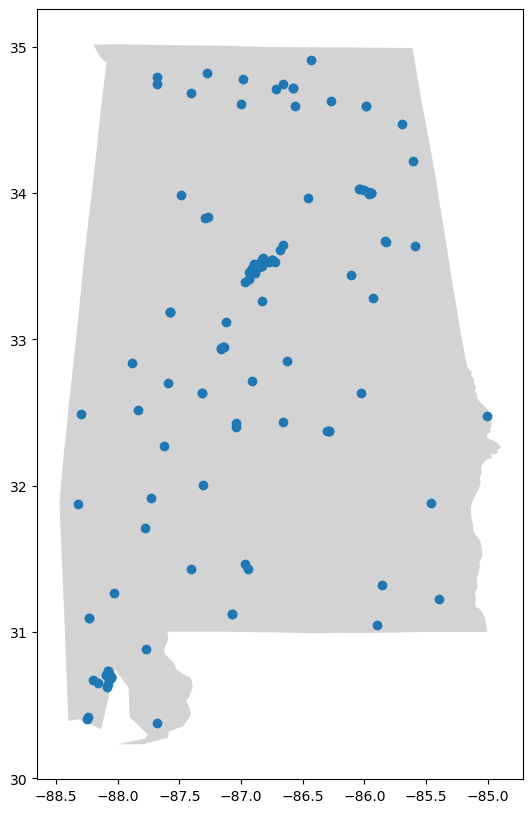

In [73]:
fig, ax = plt.subplots(figsize = (10,10))
us_map = gpd.read_file("./states_21basic/states.shp")
us_map[us_map.STATE_ABBR == "AL"].plot(ax = ax, color='lightgrey')
al_locations.plot(ax = ax)

In [ ]:
# find which points live in which census blocks and aggregate
# take map of addresses (2nd) + layer of census blocks (1st)
# spatial neighbors